In [ ]:
!pip install -qU beir sentence-transformers scikit-learn matplotlib seaborn pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.4/77.4 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 29.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 114.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 122.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.

In [ ]:
!pip install --force-reinstall --no-cache-dir numpy==1.26.4 scipy --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 49.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 148.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 335.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 280.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sklearn-compat 0.1.3 requires scikit-learn<1.7,>=1.2, but you have scikit-learn 1.7.0 which is incompatible.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
plot

In [ ]:
import os
import time
import numpy as np
from beir.datasets.data_loader import GenericDataLoader
from beir import util
from sentence_transformers import SentenceTransformer
import torch
from google.colab import userdata
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import pandas as pd
import shutil

# Security-specific imports
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from scipy.spatial.distance import euclidean, cosine
from scipy.stats import spearmanr

/usr/local/lib/python3.11/dist-packages/beir/datasets/data_loader.py:8: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [ ]:
sys.path.append(os.getcwd())
import s_knn

In [ ]:
sknn_key = s_knn.SKNNKey.generate_random()

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
try:
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device=device)
    print(f"Model 'all-MiniLM-L6-v2' loaded successfully on {device}.")
except Exception as e:
    print(f"Failed to load embedding model on {device}: {e}")
    embedding_model = SentenceTransformer("all-MiniLM-L6-v2", device="cpu")
    print("Loaded model on CPU as a fallback.")
DIMENSION = 384 # Dimension for all-MiniLM-L6-v2

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Model 'all-MiniLM-L6-v2' loaded successfully on cuda.


In [ ]:
beir_data_path = "./beir_datasets_security" # Separate path for clarity
os.makedirs(beir_data_path, exist_ok=True)
loaded_beir_data = {}

In [ ]:
dataset_name = "fiqa"
if os.path.exists(os.path.join(beir_data_path, dataset_name)):
    print(f"Dataset folder '{os.path.join(beir_data_path, dataset_name)}' already exists. Deleting to ensure fresh download.")
    shutil.rmtree(os.path.join(beir_data_path, dataset_name))

print(f"\nProcessing dataset: {dataset_name}")
url = f"https://public.ukp.informatik.tu-darmstadt.de/thakur/BEIR/datasets/{dataset_name}.zip"
out_dir = os.path.join(beir_data_path, dataset_name)

print(f"Downloading {dataset_name} from {url} to {out_dir}...")
data_path_after_unzip = util.download_and_unzip(url, out_dir)

try:
    corpus, _, _ = GenericDataLoader(data_folder=data_path_after_unzip).load(split="test")
    loaded_beir_data[dataset_name] = {"corpus": corpus}
    print(f"Successfully loaded corpus for {dataset_name}.")
    print(f"  Corpus size: {len(corpus)} documents")
    print(f"  [CRITICAL DEBUG] Actual loaded corpus size for '{dataset_name}': {len(loaded_beir_data[dataset_name]['corpus'])} documents.")
except Exception as e:
    raise RuntimeError(f"Error loading {dataset_name} corpus from '{data_path_after_unzip}': {e}")


Processing dataset: fiqa


./beir_datasets_security/fiqa/fiqa.zip:   0%|          | 0.00/17.1M [00:00<?, ?iB/s]

  0%|          | 0/57638 [00:00<?, ?it/s]

Successfully loaded corpus for fiqa.
  Corpus size: 57638 documents
  [CRITICAL DEBUG] Actual loaded corpus size for 'fiqa': 57638 documents.


In [ ]:
# Security Evaluation Parameters
# Using 1000 documents for all tests for consistency and efficiency
COMMON_SECURITY_SAMPLE_SIZE = 1000
SECURITY_M_KNOWN_DOCS = 1000 # M for NN Re-identification (attacker's prior knowledge)
SECURITY_N_SUBSET = 1000
SECURITY_T_TRIALS = 1000 # T for NN Re-identification
SECURITY_ATTR_INF_SIZE = 1000 # Size for Attribute Inference
SECURITY_MEM_INF_PROBES = 500 # Number of probes for Membership Inference
 # Ensure minimum 2 probes for membership inference
if SECURITY_MEM_INF_PROBES < 2:
    SECURITY_MEM_INF_PROBES = 2


In [ ]:
# Helper function to get embeddings for security tests
def get_embeddings_for_security_tests(dataset_name: str, num_samples: int):
    corpus = loaded_beir_data[dataset_name]["corpus"]
    doc_ids = list(corpus.keys())

    # Sample if num_samples is less than total documents, otherwise use all
    if num_samples < len(doc_ids):
        sampled_doc_ids = np.random.choice(doc_ids, num_samples, replace=False)
    else:
        sampled_doc_ids = doc_ids # Use all if fewer samples requested than available

    sampled_contents = [f"{corpus[did].get('title', '')} {corpus[did].get('text', '')}".strip() for did in sampled_doc_ids]

    # Generate plaintext embeddings
    # Ensure numpy arrays are returned for direct use with scipy.spatial.distance functions
    plaintext_embeddings = embedding_model.encode(sampled_contents, convert_to_numpy=True)

    # Encrypt embeddings
    encrypted_embeddings = []
    for vec in plaintext_embeddings:
        # Convert numpy array to Python list before encryption
        encrypted_result = s_knn.encrypt_vector(sknn_key, vec.tolist())
        encrypted_embeddings.append(encrypted_result.ciphertext)

    return plaintext_embeddings, np.array(encrypted_embeddings), sampled_doc_ids

In [ ]:
def calculate_distance_matrix(vectors, metric='cosine'):
    """Calculates distance matrix for a set of vectors. Metric can be 'euclidean' or 'cosine'."""
    n = len(vectors)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(i + 1, n):
            if metric == 'euclidean':
                dist = euclidean(vectors[i], vectors[j])
            elif metric == 'cosine':
                # Cosine distance = 1 - cosine similarity. scipy.spatial.distance.cosine computes this.
                dist = cosine(vectors[i], vectors[j])
            else:
                raise ValueError("Metric must be 'euclidean' or 'cosine'")
            matrix[i, j] = matrix[j, i] = dist
    return matrix

In [ ]:
def run_distance_structure_leakage(plaintext_embeddings, encrypted_embeddings, metric='cosine'):
    """
    Calculates Spearman rank-correlation (rho) for distance matrices.
    Lower rho indicates more privacy.
    """
    if len(plaintext_embeddings) < 2:
        print("Not enough samples for Distance-Structure Leakage.")
        return None

    plain_dist_matrix = calculate_distance_matrix(plaintext_embeddings, metric=metric)
    enc_dist_matrix = calculate_distance_matrix(encrypted_embeddings, metric=metric)

    n_samples = len(plain_dist_matrix)
    # Extract unique pairs (upper triangle excluding diagonal)
    upper_triangle_indices = np.triu_indices(n_samples, k=1)
    plain_distances = plain_dist_matrix[upper_triangle_indices]
    enc_distances = enc_dist_matrix[upper_triangle_indices]

    # Handle cases where std dev is zero, which breaks spearmanr
    if np.std(plain_distances) == 0 or np.std(enc_distances) == 0:
        if np.all(plain_distances == enc_distances):
            return 1.0 # Perfect correlation if all distances are identical
        else:
            return 0.0 # No correlation if one is flat and other isn't (or undefined)

    rho, _ = spearmanr(plain_distances, enc_distances)
    return rho

In [ ]:
def run_nn_re_identification_attack(corpus_plaintext_embeddings, corpus_encrypted_embeddings, attacker_known_size=SECURITY_M_KNOWN_DOCS, num_trials=SECURITY_T_TRIALS, metric='cosine'):
    """
    Simulates an NN re-identification attack.
    Attacker knows M encrypted docs. Probes an insider or outsider.
    Values near 1/M indicate strong privacy.
    """
    total_corpus_size = len(corpus_plaintext_embeddings)

    # --- Robust Parameter Adjustment ---
    # Ensure we have enough documents for both known set and probes (insider/outsider)
    # We need attacker_known_size for the known set.
    # We need num_trials for total probes (half insiders, half outsiders).
    # So, required minimum is attacker_known_size + (num_trials / 2) if outsider probes are distinct.
    # Or simply, ensure total_corpus_size is large enough to draw samples.

    # If attacker_known_size is larger than corpus, reduce it
    if attacker_known_size > total_corpus_size:
        attacker_known_size = total_corpus_size // 2 # Use at most half for known if corpus is small
        print(f"Warning: attacker_known_size reduced to {attacker_known_size} due to corpus size.")

    # Ensure num_trials is not excessive. We need num_trials/2 insiders and num_trials/2 outsiders.
    # Outsiders must be distinct from known_indices.
    max_possible_insider_probes = attacker_known_size
    max_possible_outsider_probes = total_corpus_size - attacker_known_size

    num_insider_probes_to_attempt = num_trials // 2
    num_outsider_probes_to_attempt = num_trials - num_insider_probes_to_attempt # Handles odd num_trials

    if num_insider_probes_to_attempt > max_possible_insider_probes:
        num_insider_probes_to_attempt = max_possible_insider_probes
        print(f"Warning: Number of insider probes reduced to {num_insider_probes_to_attempt} due to attacker_known_size.")

    if num_outsider_probes_to_attempt > max_possible_outsider_probes:
        num_outsider_probes_to_attempt = max_possible_outsider_probes
        print(f"Warning: Number of outsider probes reduced to {num_outsider_probes_to_attempt} due to corpus size.")

    actual_num_trials = num_insider_probes_to_attempt + num_outsider_probes_to_attempt
    if actual_num_trials == 0 or num_insider_probes_to_attempt == 0:
        print("Warning: Cannot perform NN Re-ID attack - not enough valid trials/insider probes can be generated.")
        return {"Hit@1": None, "Hit@5": None, "random_baseline": 1/attacker_known_size if attacker_known_size > 0 else 0}

    print(f"  Running NN Re-ID with attacker_known_size={attacker_known_size}, actual_num_trials={actual_num_trials} ({num_insider_probes_to_attempt} insiders, {num_outsider_probes_to_attempt} outsiders).")


    # Simulate attacker's prior knowledge: M encrypted documents
    all_corpus_indices = np.arange(total_corpus_size)
    known_indices = np.random.choice(all_corpus_indices, attacker_known_size, replace=False)
    known_plaintext_embeds = corpus_plaintext_embeddings[known_indices]
    known_encrypted_embeds = corpus_encrypted_embeddings[known_indices]

    # Pool for outsider probes
    outsider_pool_indices = np.setdiff1d(all_corpus_indices, known_indices)

    hits_at_1 = 0
    hits_at_5 = 0
    total_successful_insider_probes = 0 # Track only probes that actually run and contribute

    # Generate a mixed list of probe types to ensure balance
    probe_types = [True] * num_insider_probes_to_attempt + [False] * num_outsider_probes_to_attempt
    np.random.shuffle(probe_types) # Randomize order of insider/outsider probes

    # Keep track of indices already used for probes to avoid duplicates
    used_known_probe_indices = set()
    used_outsider_probe_indices = set()


    for is_insider_trial in tqdm(probe_types, desc="NN Re-ID Attack Trials"):
        probe_plaintext_vec = None
        true_known_idx_in_subset = -1 # Index within the 'known_encrypted_embeds' list

        if is_insider_trial:
            # Select an insider: a document from the known set that hasn't been used as a probe yet
            available_known_indices = list(set(known_indices) - used_known_probe_indices)
            if not available_known_indices:
                continue # No more unique insider probes available

            probe_original_idx = np.random.choice(available_known_indices)
            used_known_probe_indices.add(probe_original_idx)

            probe_plaintext_vec = corpus_plaintext_embeddings[probe_original_idx]
            # Find its index within the 'known_indices' array
            true_known_idx_in_subset = np.where(known_indices == probe_original_idx)[0][0]
            total_successful_insider_probes += 1
        else: # Outsider trial
            available_outsider_indices = list(outsider_pool_indices) # No need to track used for outsiders unless num_trials is very large
            if not available_outsider_indices:
                continue # No more unique outsider probes available

            probe_original_idx = np.random.choice(available_outsider_indices)
            # For outsiders, no 'true_known_idx_in_subset'
            probe_plaintext_vec = corpus_plaintext_embeddings[probe_original_idx]

        if probe_plaintext_vec is None: # Skip if probe selection failed
            continue

        # Re-encrypt the probe with a fresh IV/key (simulating a query)
        # This is critical for Paillier: probe_plaintext_vec is a numpy array
        # For DCPE: dcpe.encrypt_vector(DCPE_KEY, probe_plaintext_vec.tolist(), DCPE_APPROXIMATION_FACTOR).ciphertext
        # For Paillier: paillier_lib.encrypt_vector(PAILLIER_KEY, probe_plaintext_vec.tolist(), PAILLIER_SCALING_FACTOR).ciphertext
        # Assuming this function is used for DCPE, the line below is correct for DCPE.
        # Make sure to adjust in Paillier script.
        probe_encrypted_fresh_iv = s_knn.encrypt_vector(sknn_key, probe_plaintext_vec.tolist()).ciphertext
        probe_encrypted_fresh_iv = np.array(probe_encrypted_fresh_iv)

        # Compute distances to all known encrypted documents
        distances = []
        for i in range(len(known_encrypted_embeds)):
            if metric == 'euclidean':
                dist = euclidean(probe_encrypted_fresh_iv, known_encrypted_embeds[i])
            elif metric == 'cosine':
                dist = cosine(probe_encrypted_fresh_iv, known_encrypted_embeds[i])
            distances.append(dist)

        if is_insider_trial:
            # Rank of the true insider in the sorted distances
            # Find the distance of the true item from the 'known_encrypted_embeds' array
            if true_known_idx_in_subset < 0 or true_known_idx_in_subset >= len(distances):
                continue # Safety check, should not happen with robust sampling

            true_dist = distances[true_known_idx_in_subset]

            # Count how many distances are less than or equal to the true distance
            # This gives its rank (1-based)
            rank_star = np.sum(np.array(distances) <= true_dist)

            if rank_star == 1:
                hits_at_1 += 1
            if rank_star <= 5:
                hits_at_5 += 1

    if total_successful_insider_probes == 0:
        print("Warning: No valid insider probes were successfully executed for NN Re-ID attack to calculate hits.")
        return {"Hit@1": 0.0, "Hit@5": 0.0, "random_baseline": 1/attacker_known_size if attacker_known_size > 0 else 0}

    hit_1 = hits_at_1 / total_successful_insider_probes
    hit_5 = hits_at_5 / total_successful_insider_probes
    random_baseline = 1 / attacker_known_size if attacker_known_size > 0 else 0

    return {"Hit@1": hit_1, "Hit@5": hit_5, "random_baseline": random_baseline}

In [ ]:
def run_attribute_inference(embeddings, labels, test_size=0.1, random_state=42):
    """
    Trains a logistic regression model on vectors to predict attributes.
    Higher accuracy indicates more semantic leakage.
    """
    if len(embeddings) < 100 or len(np.unique(labels)) < 2:
        print("Not enough samples or unique labels for Attribute Inference.")
        return None

    X = embeddings
    y = labels

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=random_state)

    try:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        return acc
    except Exception as e:
        print(f"Error in Attribute Inference training/prediction: {e}")
        return None

In [ ]:
def run_membership_inference(corpus_encrypted_embeddings, num_probes=SECURITY_MEM_INF_PROBES, metric='cosine'):
    """
    Tests membership inference via minimum distance.
    AUC near 0.5 indicates no advantage over chance.
    """
    if len(corpus_encrypted_embeddings) < num_probes * 2:
        print(f"Warning: Not enough documents for Membership Inference. Need at least {num_probes*2}. Skipping.")
        return None

    # Randomly select member and non-member indices
    indices = np.arange(len(corpus_encrypted_embeddings))

    # Ensure enough members and non-members
    if len(indices) < num_probes * 2:
        print(f"Warning: Corpus size ({len(indices)}) is too small for {num_probes} members and {num_probes} non-members. Reducing probe count.")
        actual_num_probes = len(indices) // 2
        member_indices = np.random.choice(indices, actual_num_probes, replace=False)
    else:
        member_indices = np.random.choice(indices, num_probes, replace=False)
        actual_num_probes = num_probes

    non_member_indices = np.setdiff1d(indices, member_indices)
    non_member_indices = np.random.choice(non_member_indices, actual_num_probes, replace=False) # Sample non-members

    member_probes_plaintext = corpus_encrypted_embeddings[member_indices]
    non_member_probes_plaintext = corpus_encrypted_embeddings[non_member_indices]

    # Re-encrypt member probes with fresh IV/key (simulating a query from a member)
    member_probes_encrypted = []
    for vec in member_probes_plaintext:
        member_probes_encrypted.append(s_knn.encrypt_vector(sknn_key, vec.tolist()).ciphertext)
    member_probes_encrypted = np.array(member_probes_encrypted)

    # Encrypt non-member probes (simulating a query from a non-member)
    non_member_probes_encrypted = []
    for vec in non_member_probes_plaintext:
         non_member_probes_encrypted.append(s_knn.encrypt_vector(sknn_key, vec.tolist()).ciphertext)
    non_member_probes_encrypted = np.array(non_member_probes_encrypted)

    all_probes = np.concatenate((member_probes_encrypted, non_member_probes_encrypted))
    true_labels = np.array([1]*actual_num_probes + [0]*actual_num_probes) # 1 for member, 0 for non-member

    min_distances = []
    for q_encrypted in tqdm(all_probes, desc="Membership Inference Searches"):
        distances = []
        for z_i_encrypted in corpus_encrypted_embeddings:
            if metric == 'euclidean':
                dist = euclidean(q_encrypted, z_i_encrypted)
            elif metric == 'cosine':
                dist = cosine(q_encrypted, z_i_encrypted)
            distances.append(dist)
        min_distances.append(np.min(distances))

    # For distance-based membership inference, lower distance usually means more likely a member.
    # So, we'll use 1 - distance as the score for ROC curve, where higher score means more likely positive.
    scores = 1 - np.array(min_distances)

    if len(np.unique(true_labels)) < 2:
        print("Not enough unique labels for ROC AUC calculation.")
        return None

    fpr, tpr, _ = roc_curve(true_labels, scores)
    roc_auc = auc(fpr, tpr)
    return roc_auc

In [ ]:
def run_absolute_distance_distortion(plaintext_embeddings, encrypted_embeddings, metric='cosine'):
    """
    Calculates the mean absolute distance distortion.
    Larger Delta indicates stronger obfuscation.
    """
    if len(plaintext_embeddings) < 2:
        print("Not enough samples for Absolute Distance Distortion.")
        return None

    plain_dist_matrix = calculate_distance_matrix(plaintext_embeddings, metric=metric)
    enc_dist_matrix = calculate_distance_matrix(encrypted_embeddings, metric=metric)

    n_samples = len(plain_dist_matrix)
    upper_triangle_indices = np.triu_indices(n_samples, k=1)
    plain_distances = plain_dist_matrix[upper_triangle_indices]
    enc_distances = enc_dist_matrix[upper_triangle_indices]

    distortions = []
    for p_dist, e_dist in zip(plain_distances, enc_distances):
        if p_dist == 0: # Skip division by zero, or handle appropriately
            continue # Or consider it infinite distortion, depending on definition
        delta_ij = np.abs(p_dist - e_dist) / p_dist
        distortions.append(delta_ij)

    if not distortions:
        return 0.0

    return np.mean(distortions)

In [ ]:
security_results = {}

# Use the NFCorpus dataset as a representative
dataset_for_security = "fiqa"


In [ ]:
 corpus_plain_embeds, corpus_enc_embeds, _ = get_embeddings_for_security_tests(
     dataset_for_security, COMMON_SECURITY_SAMPLE_SIZE
 )

 # Pair them up for functions that need both for comparison (like Attribute Inference and Distance Distortion)
 corpus_paired_embeds = list(zip(corpus_plain_embeds, corpus_enc_embeds))

In [ ]:
# Test 1: Distance-Structure Leakage (Spearman rho)
print("\nRunning Distance-Structure Leakage (Spearman ρ)...")
# Pass the paired list for this test
rho_val = run_distance_structure_leakage(corpus_plain_embeds, corpus_enc_embeds, metric='cosine')
security_results["Distance_Structure_Leakage_rho"] = rho_val
print(f"  Spearman ρ: {rho_val:.4f}" if rho_val is not None else "  Spearman ρ: N/A")



Running Distance-Structure Leakage (Spearman ρ)...
  Spearman ρ: 1.0000


In [ ]:
# Test 2: Nearest-Neighbour Re-Identification Attack (Hit@1, Hit@5)
print("\nRunning Nearest-Neighbour Re-Identification Attack...")
nn_re_id_results = run_nn_re_identification_attack(
    corpus_plain_embeds, # This is the full pool of plaintext embeddings (numpy array)
    corpus_enc_embeds, # This is the full pool of encrypted embeddings (numpy array)
    attacker_known_size=SECURITY_M_KNOWN_DOCS, # Now 1000
    num_trials=SECURITY_T_TRIALS, # Now 1000
    metric='cosine' # Using cosine for DCPE
)
security_results["NN_ReID_Hit@1"] = nn_re_id_results.get("Hit@1")
security_results["NN_ReID_Hit@5"] = nn_re_id_results.get("Hit@5")
security_results["NN_ReID_Random_Baseline"] = nn_re_id_results.get("random_baseline")
print(f"  Hit@1: {nn_re_id_results.get('Hit@1', 'N/A'):.4f}" if isinstance(nn_re_id_results.get('Hit@1'), (int, float)) else f"  Hit@1: {nn_re_id_results.get('Hit@1', 'N/A')}")
print(f"  Hit@5: {nn_re_id_results.get('Hit@5', 'N/A'):.4f}" if isinstance(nn_re_id_results.get('Hit@5'), (int, float)) else f"  Hit@5: {nn_re_id_results.get('Hit@5', 'N/A')}")
print(f"  Random Baseline (1/M): {nn_re_id_results.get('random_baseline', 'N/A'):.4f}" if isinstance(nn_re_id_results.get('random_baseline'), (int, float)) else f"  Random Baseline: {nn_re_id_results.get('random_baseline', 'N/A')}")



Running Nearest-Neighbour Re-Identification Attack...
  Running NN Re-ID with attacker_known_size=1000, actual_num_trials=500 (500 insiders, 0 outsiders).


NN Re-ID Attack Trials:   0%|          | 0/500 [00:00<?, ?it/s]

  Hit@1: 1.0000
  Hit@5: 1.0000
  Random Baseline (1/M): 0.0010


In [ ]:
# Test 3: Attribute-Inference on Encrypted Vectors (Accuracy)
print("\nRunning Attribute-Inference...")
# Use the common corpus for this test as well
dummy_labels = np.random.randint(0, 2, size=len(corpus_plain_embeds))

plain_acc = run_attribute_inference(corpus_plain_embeds, dummy_labels) # Use plain for plain_acc
enc_acc = run_attribute_inference(corpus_enc_embeds, dummy_labels) # Use enc for enc_acc
security_results["Attr_Inf_Plain_Accuracy"] = plain_acc
security_results["Attr_Inf_Enc_Accuracy"] = enc_acc
print(f"  Plaintext Accuracy: {plain_acc:.4f}" if plain_acc is not None else "  Plaintext Accuracy: N/A")
print(f"  Encrypted Accuracy: {enc_acc:.4f}" if enc_acc is not None else "  Encrypted Accuracy: N/A")


Running Attribute-Inference...
  Plaintext Accuracy: 0.5800
  Encrypted Accuracy: 0.5800


In [ ]:
# Test 4: Membership-Inference via Minimum Distance (AUC)
print("\nRunning Membership-Inference via Minimum Distance...")
auc_val = run_membership_inference(corpus_enc_embeds, num_probes=SECURITY_MEM_INF_PROBES, metric='cosine')
security_results["Membership_Inf_AUC"] = auc_val
print(f"  Membership Inference AUC: {auc_val:.4f}" if auc_val is not None else "  Membership Inference AUC: N/A")


Running Membership-Inference via Minimum Distance...


Membership Inference Searches:   0%|          | 0/1000 [00:00<?, ?it/s]

  Membership Inference AUC: 0.5206


In [ ]:
# Test 5: Absolute Distance-Distortion (Mean Delta)
print("\nRunning Absolute Distance-Distortion (Mean Δ)...")
delta_val = run_absolute_distance_distortion(corpus_plain_embeds, corpus_enc_embeds, metric='cosine')
security_results["Absolute_Distance_Distortion_Delta"] = delta_val
print(f"  Mean Δ: {delta_val:.4f}" if delta_val is not None else "  Mean Δ: N/A")


Running Absolute Distance-Distortion (Mean Δ)...
  Mean Δ: 0.0000


In [ ]:
print("\nSecurity Results:")
for k, v in security_results.items():
    print(f"  {k}: {v}")


Security Results:
  Distance_Structure_Leakage_rho: 0.9999999999997871
  NN_ReID_Hit@1: 1.0
  NN_ReID_Hit@5: 1.0
  NN_ReID_Random_Baseline: 0.001
  Attr_Inf_Plain_Accuracy: 0.58
  Attr_Inf_Enc_Accuracy: 0.58
  Membership_Inf_AUC: 0.520572
  Absolute_Distance_Distortion_Delta: 7.2147759401312375e-09



--- Phase 7: Generating Improved Security Visualizations ---

Security Results DataFrame for plotting:
   Distance_Structure_Leakage_rho  NN_ReID_Hit@1  NN_ReID_Hit@5  NN_ReID_Random_Baseline  Attr_Inf_Plain_Accuracy  Attr_Inf_Enc_Accuracy  Membership_Inf_AUC  Absolute_Distance_Distortion_Delta
0                             1.0            1.0            1.0                    0.001                     0.58                   0.58            0.520572                        7.214776e-09


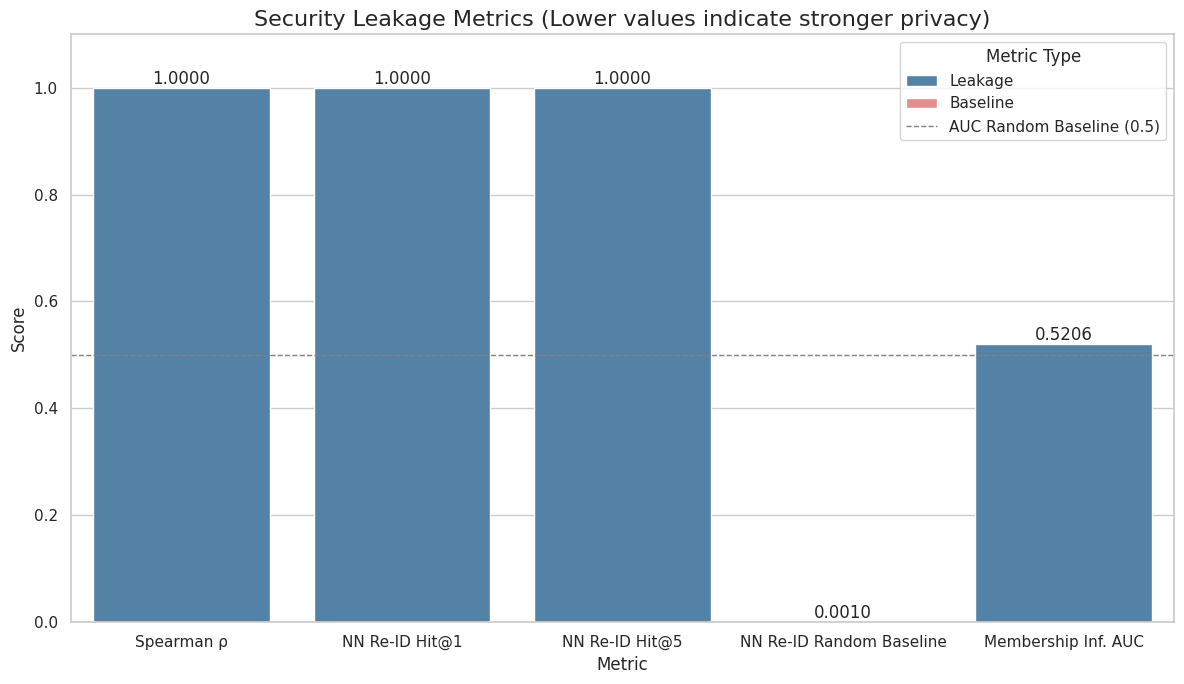

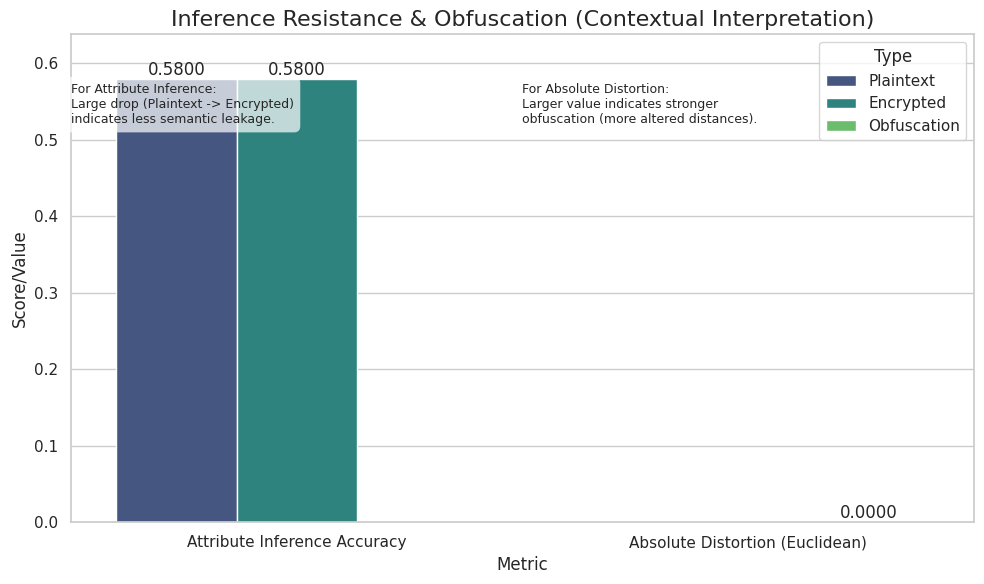


--- Phase 7: Security Visualizations Generated ---


In [ ]:
# --- Phase 7: Security Visualization (Improved) ---
print("\n--- Phase 7: Generating Improved Security Visualizations ---")

# Convert security_results to a DataFrame for plotting
security_df = pd.DataFrame([security_results])
pd.set_option('display.max_columns', None) # Ensure all columns are displayed for debug
print("\nSecurity Results DataFrame for plotting:")
print(security_df.to_string())

# Set a professional plotting style
sns.set_theme(style="whitegrid", palette="viridis") # Use a pleasant, professional palette

# --- Chart 1: Security Leakage Metrics (Lower is Better) ---
# Metrics: Spearman ρ, NN Re-ID Hit@1, NN Re-ID Hit@5, Membership Inference AUC
# Interpretation: Lower values are better for privacy (except AUC, where 0.5 is ideal)
# For AUC, we want to show its deviation from 0.5, or just plot it directly and explain.
# Let's plot it directly and use annotations.

leakage_plot_data = []
if "Distance_Structure_Leakage_rho" in security_df.columns and security_df["Distance_Structure_Leakage_rho"].iloc[0] is not None:
    leakage_plot_data.append({"Metric": "Spearman ρ", "Value": security_df["Distance_Structure_Leakage_rho"].iloc[0], "Type": "Leakage"})
if "Similarity_Structure_Leakage_rho" in security_df.columns and security_df["Similarity_Structure_Leakage_rho"].iloc[0] is not None: # For Paillier
    leakage_plot_data.append({"Metric": "Spearman ρ (Similarity)", "Value": security_df["Similarity_Structure_Leakage_rho"].iloc[0], "Type": "Leakage"})

nn_reid_metrics_present = True
for m in ["NN_ReID_Hit@1", "NN_ReID_Hit@5"]:
    if m not in security_df.columns or security_df[m].iloc[0] is None:
        nn_reid_metrics_present = False
        break
if nn_reid_metrics_present:
    leakage_plot_data.append({"Metric": "NN Re-ID Hit@1", "Value": security_df["NN_ReID_Hit@1"].iloc[0], "Type": "Leakage"})
    leakage_plot_data.append({"Metric": "NN Re-ID Hit@5", "Value": security_df["NN_ReID_Hit@5"].iloc[0], "Type": "Leakage"})
    leakage_plot_data.append({"Metric": "NN Re-ID Random Baseline", "Value": security_df["NN_ReID_Random_Baseline"].iloc[0], "Type": "Baseline"})


if "Membership_Inf_AUC" in security_df.columns and security_df["Membership_Inf_AUC"].iloc[0] is not None:
    leakage_plot_data.append({"Metric": "Membership Inf. AUC", "Value": security_df["Membership_Inf_AUC"].iloc[0], "Type": "Leakage"})

leakage_plot_df = pd.DataFrame(leakage_plot_data)

if not leakage_plot_df.empty:
    plt.figure(figsize=(12, 7)) # Adjusted size for clarity
    ax = sns.barplot(x="Metric", y="Value", hue="Type", data=leakage_plot_df, dodge=False, palette={"Leakage": "steelblue", "Baseline": "lightcoral"})

    plt.title("Security Leakage Metrics (Lower values indicate stronger privacy)", fontsize=16)
    plt.ylabel("Score", fontsize=12)
    plt.xlabel("Metric", fontsize=12)
    plt.ylim(0, max(leakage_plot_df["Value"].max() * 1.1, 0.1)) # Dynamic ylim, min 0.1 to show baselines

    # Add interpretations as annotations or lines
    if "Membership Inf. AUC" in leakage_plot_df["Metric"].values:
        plt.axhline(0.5, color='gray', linestyle='--', linewidth=1, label="AUC Random Baseline (0.5)")

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge') # Add value labels to bars

    plt.legend(title="Metric Type")
    plt.tight_layout()
    plt.show()
else:
    print("No leakage metrics data available for plotting.")

# --- Chart 2: Inference Resistance & Obfuscation (Contextual) ---
# Metrics: Attribute Inference Accuracy (Plain vs Encrypted), Absolute Distance/Similarity Distortion

resistance_plot_data = []
attr_inf_metrics_present = True
for m in ["Attr_Inf_Plain_Accuracy", "Attr_Inf_Enc_Accuracy"]:
    if m not in security_df.columns or security_df[m].iloc[0] is None:
        attr_inf_metrics_present = False
        break
if attr_inf_metrics_present:
    resistance_plot_data.append({"Metric": "Attribute Inference Accuracy", "Type": "Plaintext", "Value": security_df["Attr_Inf_Plain_Accuracy"].iloc[0]})
    resistance_plot_data.append({"Metric": "Attribute Inference Accuracy", "Type": "Encrypted", "Value": security_df["Attr_Inf_Enc_Accuracy"].iloc[0]})

if "Absolute_Distance_Distortion_Delta" in security_df.columns and security_df["Absolute_Distance_Distortion_Delta"].iloc[0] is not None:
    resistance_plot_data.append({"Metric": "Absolute Distortion (Euclidean)", "Type": "Obfuscation", "Value": security_df["Absolute_Distance_Distortion_Delta"].iloc[0]})
if "Absolute_Similarity_Distortion_Delta" in security_df.columns and security_df["Absolute_Similarity_Distortion_Delta"].iloc[0] is not None:
    resistance_plot_data.append({"Metric": "Absolute Distortion (Similarity)", "Type": "Obfuscation", "Value": security_df["Absolute_Similarity_Distortion_Delta"].iloc[0]})

resistance_plot_df = pd.DataFrame(resistance_plot_data)

if not resistance_plot_df.empty:
    plt.figure(figsize=(10, 6)) # Adjusted size
    ax = sns.barplot(x="Metric", y="Value", hue="Type", data=resistance_plot_df, palette="viridis")

    plt.title("Inference Resistance & Obfuscation (Contextual Interpretation)", fontsize=16)
    plt.ylabel("Score/Value", fontsize=12)
    plt.xlabel("Metric", fontsize=12)

    # Add annotations and interpretation notes
    if "Attribute Inference Accuracy" in resistance_plot_df["Metric"].values:
        plt.text(0, 0.9, "For Attribute Inference:\nLarge drop (Plaintext -> Encrypted)\nindicates less semantic leakage.",
                 horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

    if "Absolute Distortion (Euclidean)" in resistance_plot_df["Metric"].values or "Absolute Distortion (Similarity)" in resistance_plot_df["Metric"].values:
        plt.text(0.5, 0.9, "For Absolute Distortion:\nLarger value indicates stronger\nobfuscation (more altered distances).",
                 horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, fontsize=9, bbox=dict(facecolor='white', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.5'))

    for container in ax.containers:
        ax.bar_label(container, fmt='%.4f', label_type='edge')

    plt.ylim(0, max(resistance_plot_df["Value"].max() * 1.1, 0.1)) # Dynamic ylim
    plt.legend(title="Type")
    plt.tight_layout()
    plt.show()
else:
    print("No inference resistance/obfuscation data available for plotting.")

print("\n--- Phase 7: Security Visualizations Generated ---")

In [ ]:


# --- UNENCRYPTED (PLAINTEXT) SECURITY METRICS ---

plaintext_security_results = {}

print("\n==============================")
print("Running Security Metrics on UNENCRYPTED (PLAINTEXT) Embeddings")
print("==============================")

# 1. Distance-Structure Leakage (Spearman ρ)
print("\n[PLAINTEXT] Distance-Structure Leakage (Spearman ρ)...")
rho_val_plain = run_distance_structure_leakage(corpus_plain_embeds, corpus_plain_embeds, metric='cosine')
plaintext_security_results["Distance_Structure_Leakage_rho"] = rho_val_plain
print(f"  Spearman ρ: {rho_val_plain:.4f}" if rho_val_plain is not None else "  Spearman ρ: N/A")

# 2. Nearest-Neighbour Re-Identification Attack (Hit@1, Hit@5)
print("\n[PLAINTEXT] Nearest-Neighbour Re-Identification Attack...")
nn_re_id_results_plain = run_nn_re_identification_attack(
    corpus_plain_embeds,
    corpus_plain_embeds,
    attacker_known_size=SECURITY_M_KNOWN_DOCS,
    num_trials=SECURITY_T_TRIALS,
    metric='cosine'
)
plaintext_security_results["NN_ReID_Hit@1"] = nn_re_id_results_plain.get("Hit@1")
plaintext_security_results["NN_ReID_Hit@5"] = nn_re_id_results_plain.get("Hit@5")
plaintext_security_results["NN_ReID_Random_Baseline"] = nn_re_id_results_plain.get("random_baseline")
print(f"  Hit@1: {nn_re_id_results_plain.get('Hit@1', 'N/A'):.4f}" if isinstance(nn_re_id_results_plain.get('Hit@1'), (int, float)) else f"  Hit@1: {nn_re_id_results_plain.get('Hit@1', 'N/A')}")
print(f"  Hit@5: {nn_re_id_results_plain.get('Hit@5', 'N/A'):.4f}" if isinstance(nn_re_id_results_plain.get('Hit@5'), (int, float)) else f"  Hit@5: {nn_re_id_results_plain.get('Hit@5', 'N/A')}")
print(f"  Random Baseline (1/M): {nn_re_id_results_plain.get('random_baseline', 'N/A'):.4f}" if isinstance(nn_re_id_results_plain.get('random_baseline'), (int, float)) else f"  Random Baseline: {nn_re_id_results_plain.get('random_baseline', 'N/A')}")

# 3. Attribute-Inference on Plaintext Vectors (Accuracy)
print("\n[PLAINTEXT] Attribute-Inference...")
plain_acc_plain = run_attribute_inference(corpus_plain_embeds, dummy_labels)
plaintext_security_results["Attr_Inf_Plain_Accuracy"] = plain_acc_plain
print(f"  Plaintext Accuracy: {plain_acc_plain:.4f}" if plain_acc_plain is not None else "  Plaintext Accuracy: N/A")

# 4. Membership-Inference via Minimum Distance (AUC)
print("\n[PLAINTEXT] Membership-Inference via Minimum Distance...")
auc_val_plain = run_membership_inference(corpus_plain_embeds, num_probes=SECURITY_MEM_INF_PROBES, metric='cosine')
plaintext_security_results["Membership_Inf_AUC"] = auc_val_plain
print(f"  Membership Inference AUC: {auc_val_plain:.4f}" if auc_val_plain is not None else "  Membership Inference AUC: N/A")

# 5. Absolute Distance-Distortion (Mean Δ)
print("\n[PLAINTEXT] Absolute Distance-Distortion (Mean Δ)...")
delta_val_plain = run_absolute_distance_distortion(corpus_plain_embeds, corpus_plain_embeds, metric='cosine')
plaintext_security_results["Absolute_Distance_Distortion_Delta"] = delta_val_plain
print(f"  Mean Δ: {delta_val_plain:.4f}" if delta_val_plain is not None else "  Mean Δ: N/A")

print("\n[PLAINTEXT] Security Results:")
for k, v in plaintext_security_results.items():
    print(f"  {k}: {v}")

# --- Combine for Comparison Table ---
comparison_df = pd.DataFrame([
    {"Metric": k, "Encrypted": security_results.get(k), "Plaintext": plaintext_security_results.get(k)}
    for k in security_results.keys()
])
print("\n=== ENCRYPTED vs PLAINTEXT SECURITY METRICS ===")
print(comparison_df.to_string(index=False))

# You can also update your plotting code to show both sets of results side by side if desired.



Running Security Metrics on UNENCRYPTED (PLAINTEXT) Embeddings

[PLAINTEXT] Distance-Structure Leakage (Spearman ρ)...
  Spearman ρ: 1.0000

[PLAINTEXT] Nearest-Neighbour Re-Identification Attack...
  Running NN Re-ID with attacker_known_size=1000, actual_num_trials=500 (500 insiders, 0 outsiders).


NN Re-ID Attack Trials:   0%|          | 0/500 [00:00<?, ?it/s]

  Hit@1: 0.0000
  Hit@5: 0.0020
  Random Baseline (1/M): 0.0010

[PLAINTEXT] Attribute-Inference...
  Plaintext Accuracy: 0.5800

[PLAINTEXT] Membership-Inference via Minimum Distance...


Membership Inference Searches:   0%|          | 0/1000 [00:00<?, ?it/s]

  Membership Inference AUC: 0.4947

[PLAINTEXT] Absolute Distance-Distortion (Mean Δ)...
  Mean Δ: 0.0000

[PLAINTEXT] Security Results:
  Distance_Structure_Leakage_rho: 0.9999999999999998
  NN_ReID_Hit@1: 0.0
  NN_ReID_Hit@5: 0.002
  NN_ReID_Random_Baseline: 0.001
  Attr_Inf_Plain_Accuracy: 0.58
  Membership_Inf_AUC: 0.494668
  Absolute_Distance_Distortion_Delta: 0.0

=== ENCRYPTED vs PLAINTEXT SECURITY METRICS ===
                            Metric    Encrypted  Plaintext
    Distance_Structure_Leakage_rho 1.000000e+00   1.000000
                     NN_ReID_Hit@1 1.000000e+00   0.000000
                     NN_ReID_Hit@5 1.000000e+00   0.002000
           NN_ReID_Random_Baseline 1.000000e-03   0.001000
           Attr_Inf_Plain_Accuracy 5.800000e-01   0.580000
             Attr_Inf_Enc_Accuracy 5.800000e-01        NaN
                Membership_Inf_AUC 5.205720e-01   0.494668
Absolute_Distance_Distortion_Delta 7.214776e-09   0.000000
